In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math

<font size="5"> <b>Preprocessing</b> </font>

<font size="4">Read the csv files and estimates the metrics</font>

<font size="4">EventosManabi.csv is dataset where you can find the historical records from users</font>

In [105]:
# Here I load the first file and form a datetime column
eventos= pd.read_csv('C:/Users/User/Downloads/EventosManabi.csv')
eventos['FechaEventoConv']=pd.to_datetime( pd.Series(pd.to_datetime(eventos["FechaEvento"].astype(str)+' '+
                                                                    eventos["Hora"].astype(str)+':00') ) )
eventos= eventos.set_index('FechaEventoConv')


In [146]:
eventos.head(5)

,ID,FechaEvento,Hora,BaseCliente,ProvinciaCliente,CantonCliente,CiudadCliente,ParroquiaCliente,LatitudCliente,LongitudCliente,BaseEvento,NombreSitioEvento,ProvinciaEvento,CantonEvento,CiudadEvento,ParroquiaEvento,LatitudEvento,LongitudEvento,CantidadClientes
FechaEventoConv,,,,,,,,,,,,,,,,,,,
2016-04-16 17:00:00,1,2016-04-16,17,50913,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.037670,-80.4680,52064,CDLA_AURORA,MANABI,MANTA,MANTA,MANTA,-0.981686,-80.7053,1
2016-07-16 14:00:00,2,2016-07-16,14,40574,LOS RIOS,QUEVEDO,QUEVEDO,QUEVEDO,-1.021810,-79.4676,16144,VIA_SAN_MATEO,MANABI,MANTA,MANTA,MANTA,-0.957225,-80.7808,1
2016-07-17 15:00:00,3,2016-07-17,15,11308,PICHINCHA,QUITO,QUITO,CONOCOTO,-0.289892,-78.4771,51091,ERD_48_PORTOVIEJO_SUR_OESTE,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.076860,-80.4544,1
2016-04-16 17:00:00,4,2016-04-16,17,52995,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.047240,-80.4718,48262,CDLA_COMERCIO_PORTOVIEJO,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.054810,-80.4667,1
2016-07-15 05:00:00,5,2016-07-15,5,40018,AZUAY,CUENCA,CUENCA,CUENCA,-2.893350,-79.0022,18753,BAHIA_CENTRO,MANABI,SUCRE,BAHIA DE CARAQUEZ,BAHIA DE CARAQUEZ,-0.605561,-80.4261,1


In [131]:
df_clientes= pd.DataFrame(eventos['CantidadClientes'].resample('H').sum())


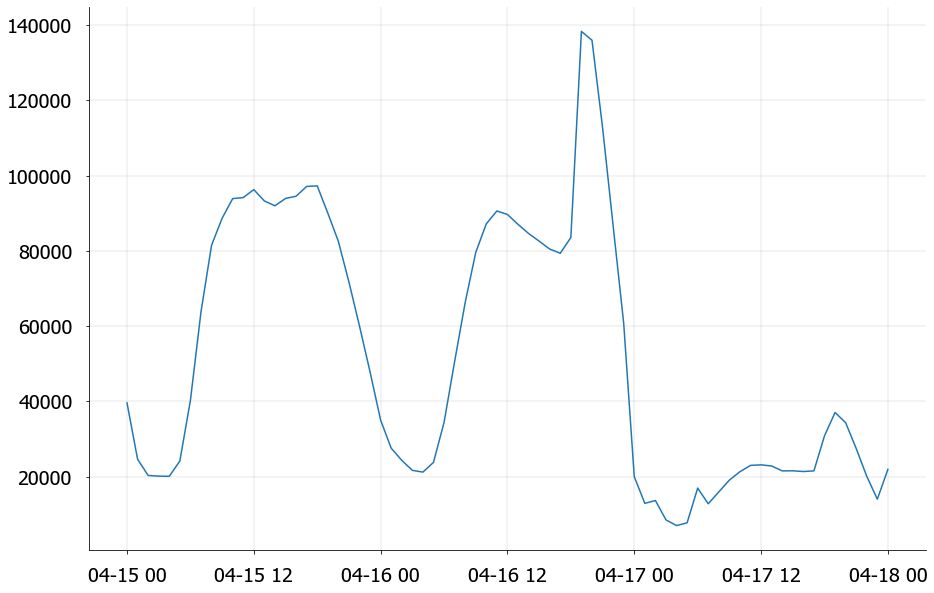

In [157]:
plt.rcParams ['font.family'] = 'Tahoma'

fig, ax1 = plt.subplots(figsize=(15,10))
for spine in [ "top", "right"]:
    ax1.spines[spine].set_visible(False)


ax1.plot(df_clientes.reset_index()[df_clientes.reset_index().FechaEventoConv <= '2016-04-18'].set_index('FechaEventoConv'))
ax1.tick_params(axis='both', which='major', pad=13,labelsize=20)
plt.grid(linewidth=0.3)
plt.show()